<a href="https://colab.research.google.com/github/lorenzdes/Finance-functions/blob/main/MSFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yahoo_fin

     |████████████████████████████████| 81 kB 3.9 MB/s 
     |████████████████████████████████| 83 kB 2.5 MB/s 
     |████████████████████████████████| 127 kB 11.9 MB/s 
     |████████████████████████████████| 103 kB 33.6 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=4cabe7ae8d0cda1cfd07efaba72ba0b555b0a81e2fb8572aeeb6479d934adce4
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=e9007fc001a7c2f50da3e99782b961ad36f442b072fd9aadae2a468e249405d7
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=f56146b8c5984e54ea912a6beb1f1d5b9fcc25c4f04a51a942173e810aeca079
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

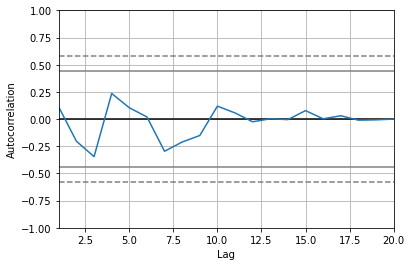

In [ ]:
## GET BALANCES and EVALUATE POLARITIES 
#pip install yahoo_fin
import yahoo_fin.stock_info as si
import pandas as pd

dow_list = si.tickers_dow()
# FTSE
balance_sheets = {}
for ticker in dow_list:
    balance_sheets[ticker] = si.get_balance_sheet(ticker)

cash_flows = {}
for ticker in dow_list:
    cash_flows[ticker] = si.get_cash_flow(ticker)
recent_cash_flows = {ticker : flow.iloc[:,:1] for ticker,flow in cash_flows.items()}
 
 
for ticker in recent_cash_flows.keys():
    recent_cash_flows[ticker].columns = ["Recent"]
combined_cash_flows = pd.concat(recent_cash_flows)
combined_cash_flows = combined_cash_flows.reset_index()
combined_cash_flows.columns = ["Ticker", "Breakdown", "Recent"]

combined_cash_flows[combined_cash_flows.Breakdown == "dividendsPaid"]

# Predict 


MSFT = cash_flows['MSFT']
#print(MSFT)

colnames = []
for i in MSFT:
  colnames.append(i)

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(MSFT)


In [ ]:
pip install tsa

ERROR: Could not find a version that satisfies the requirement tsa (from versions: none)
ERROR: No matching distribution found for tsa


In [ ]:
print(MSFT.iloc[:,0:2])

endDate                                 2021-06-30   2020-06-30
Breakdown                                                      
investments                             2876000000   6980000000
changeToLiabilities                     7431000000   5230000000
totalCashflowsFromInvestingActivities -27577000000 -12223000000
netBorrowings                          -3750000000  -5518000000
totalCashFromFinancingActivities      -48486000000 -46031000000
changeToOperatingActivities             1160000000   -673000000
issuanceOfStock                         1693000000   1343000000
netIncome                              61271000000  44281000000
changeInCash                             648000000   2220000000
repurchaseOfStock                     -27385000000 -22968000000
effectOfExchangeRate                     -29000000   -201000000
totalCashFromOperatingActivities       76740000000  60675000000
depreciation                           10900000000  12300000000
otherCashflowsFromInvestingActivities   

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(MSFT.iloc[:,0:1], order = (5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())
residuals = (model_fit.resid)
#residuals.plot()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               ARIMA Model Results                               
Dep. Variable:     D.2021-06-30 00:00:00   No. Observations:                   19
Model:                    ARIMA(5, 1, 0)   Log Likelihood                -482.812
Method:                          css-mle   S.D. of innovations    24898119171.195
Date:                   Sun, 21 Nov 2021   AIC                            979.625
Time:                           17:31:39   BIC                            986.236
Sample:                                1   HQIC                           980.744
                                                                                 
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -1.237e+09    2.2e+09     -0.563      0.583   -5.55e+09    3.07e+09
ar.L1.D.2021-06-30 00:00:00    -0.5204      0.248     -2